In [2]:
!pwd
%reload_ext autoreload
%autoreload 2

/home/sami/projects/960_dnn_notebooks


In [3]:
%cd rasta

/home/sami/projects/960_dnn_notebooks/rasta


In [12]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)
print(tf.test.is_gpu_available())

2.8.0
False


2022-04-20 19:29:54.863527: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-20 19:29:54.863836: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [13]:
new_model = tf.keras.models.load_model('models/default/model.h5',compile=False)
# new_model.summary()


In [16]:
batch_size = 32
img_height = 224
img_width = 224
d_size = "small"
test_dir = f"data/wikipaintings_{d_size}/wikipaintings_test"
val_dir = f"data/wikipaintings_{d_size}/wikipaintings_val"
test_dir = f"data/wikipaintings_{d_size}/wikipaintings_test"

# train_ds = tf.keras.utils.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.2,
#   subset="training",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size,
#   label_mode='categorical')

train_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical')

val_ds = tf.keras.utils.image_dataset_from_directory(
val_dir,
image_size=(img_height, img_width),
batch_size=batch_size,
label_mode='categorical')

test_ds = tf.keras.utils.image_dataset_from_directory(
test_dir,
image_size=(img_height, img_width),
batch_size=batch_size,
label_mode='categorical')

class_names = train_ds.class_names

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

# print(class_names)

Found 250 files belonging to 25 classes.
Found 250 files belonging to 25 classes.
Found 250 files belonging to 25 classes.


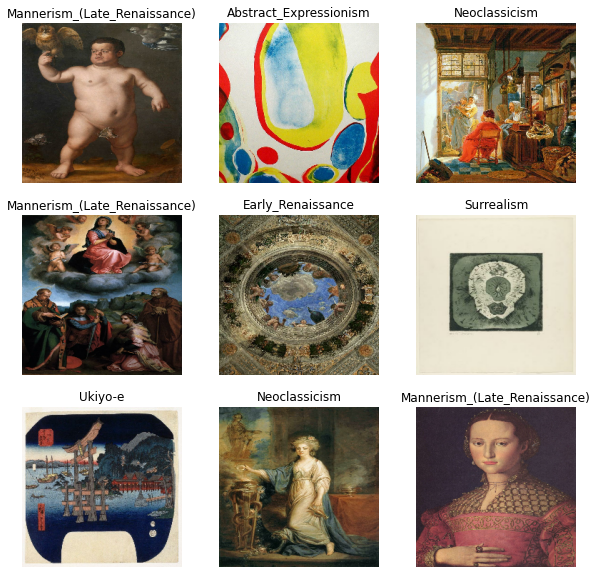

In [17]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[tf.math.argmax(labels[i])])
    plt.axis("off")

In [9]:
train_ds.class_names

AttributeError: 'PrefetchDataset' object has no attribute 'class_names'

In [18]:
loss, acc = new_model.evaluate(test_ds, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [10]:
new_model.layers.pop()

model2 = tf.keras.Model(new_model.input, new_model.layers[-1].output)
model2.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_1 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_1[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 64  9472        ['zero_padding2d_1[0][0]']       
                                )                                                             

In [20]:
model2.trainable = False
print(model2.layers[-1])

